   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0              

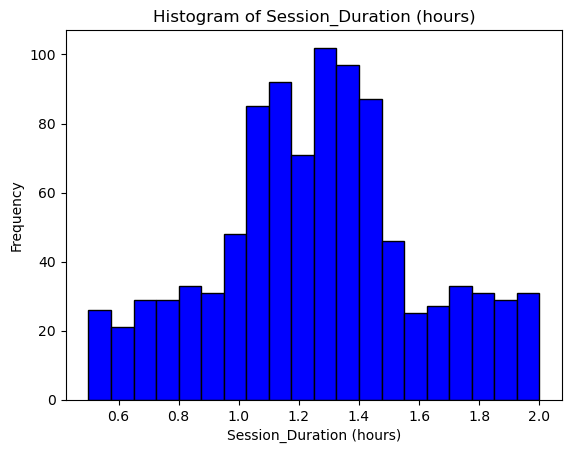

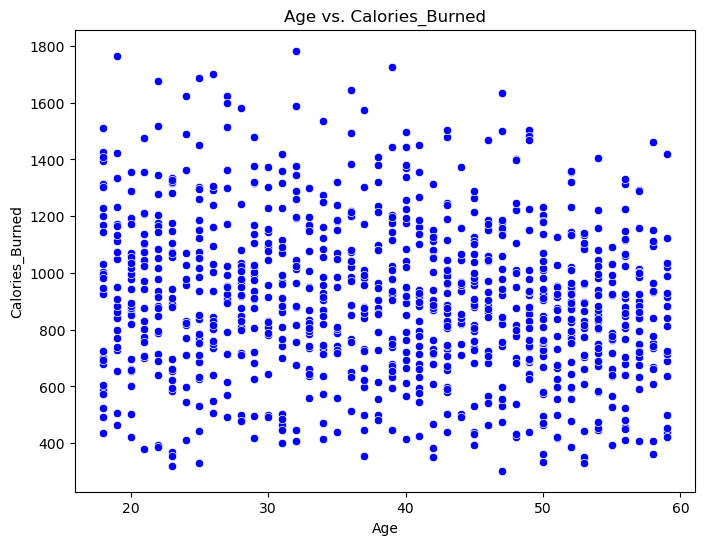

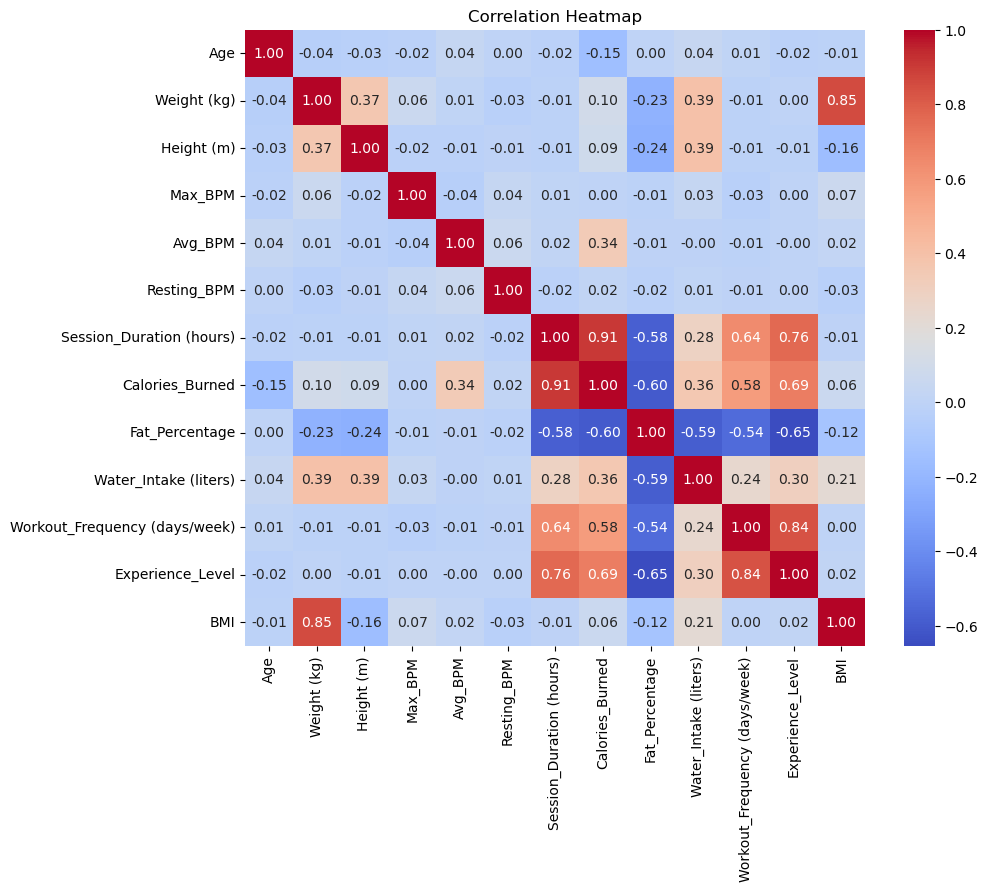

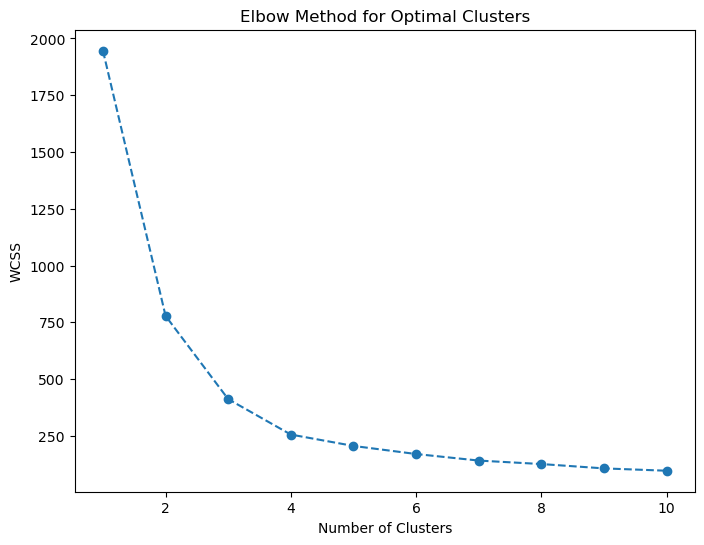

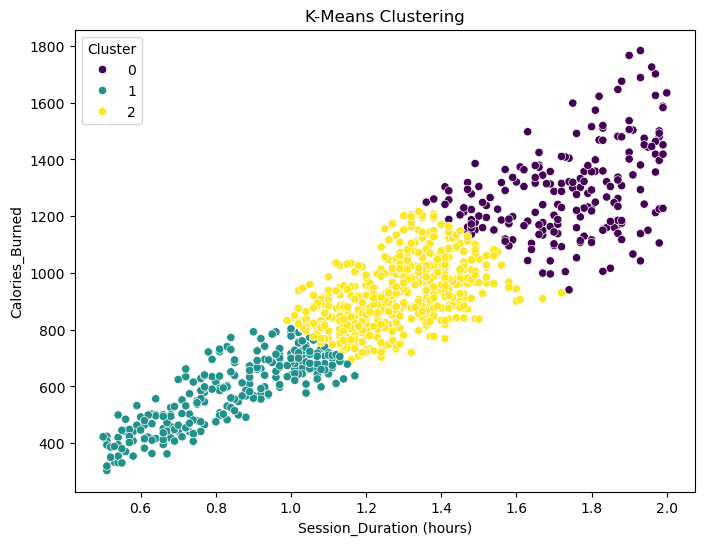

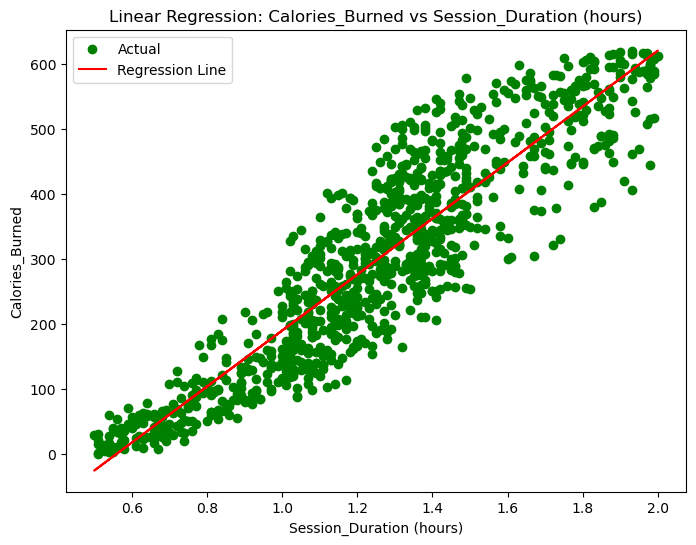

Coefficients: [[431.32687172]]
Intercept: [-241.67636247]
Mean Squared Error: 4900.916614227064
R² Score: 0.8169281054651997


In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv("gym_members_exercise_tracking.csv")

# Display the first few rows of the dataset
print(df.head())

# Summary of the dataset
print(df.info())

# Histogram function
def create_histogram(data, column_name, bins=10):
    plt.hist(data[column_name], bins=bins, color='BLUE', edgecolor='black')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

# Example usage
create_histogram(df, 'Session_Duration (hours)', bins=20)

# Scatter plot function
def create_scatter_plot(data, x_column, y_column):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x_column, y=y_column, data=data, color='blue')
    plt.title(f'{x_column} vs. {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

# Example usage
create_scatter_plot(df, 'Age', 'Calories_Burned')

# Heatmap function
def create_heatmap(data):
    numeric_data = data.select_dtypes(include='number')
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

# Example usage
create_heatmap(df)


# K-Means Clustering
def kmeans_clustering(data, features, n_clusters=3):
    # Handle missing values by imputation (mean strategy)
    imputer = SimpleImputer(strategy='mean')
    data[features] = imputer.fit_transform(data[features])
    
    X = data[features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Elbow method
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)

    # Plot the elbow method
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
    plt.title('Elbow Method for Optimal Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

    # Fit K-Means with the chosen number of clusters
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    data['Cluster'] = kmeans.fit_predict(X_scaled)

    # Scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=features[0], y=features[1], hue='Cluster', data=data, palette='viridis')
    plt.title('K-Means Clustering')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.legend(title='Cluster')
    plt.show()

# Example usage
kmeans_clustering(df, ['Session_Duration (hours)', 'Calories_Burned'])

# Linear Regression Fit
def linear_regression_fit(data, x_column, y_column):
    # Handle missing values for features
    imputer = SimpleImputer(strategy='mean')
    X = data[[x_column]].values
    y = data[y_column].values
    
    # Impute missing values for features
    X_imputed = imputer.fit_transform(X)

    # Encode categorical target variable 'y'
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)  # Convert categorical target to numeric

    # Impute missing values for the target variable (after encoding)
    y_imputed = imputer.fit_transform(y_encoded.reshape(-1, 1))  # Impute missing target values
    
    # Initialize the linear regression model
    model = LinearRegression()
    model.fit(X_imputed, y_imputed)

    # Predictions
    y_pred = model.predict(X_imputed)

    # Plotting the regression line
    plt.figure(figsize=(8, 6))
    plt.scatter(X_imputed, y_imputed, color='green', label='Actual')
    plt.plot(X_imputed, y_pred, color='red', label='Regression Line')
    plt.title(f'Linear Regression: {y_column} vs {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.legend()
    plt.show()

    # Displaying model metrics
    print(f'Coefficients: {model.coef_}')
    print(f'Intercept: {model.intercept_}')
    print(f'Mean Squared Error: {mean_squared_error(y_imputed, y_pred)}')
    print(f'R² Score: {r2_score(y_imputed, y_pred)}')

# Example usage
linear_regression_fit(df, 'Session_Duration (hours)', 'Calories_Burned')



